In [331]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [192]:
std_df = pd.read_csv("F:\dataset_for_ML\supervised\student_performance_prediction\student_performance_prediction.csv")

In [193]:
temp_df = std_df.copy()

In [194]:
temp_df.shape

(40000, 7)

In [195]:
temp_df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [196]:
temp_df.isna().sum()/temp_df.shape[0]

Student ID                                     0.000000
Study Hours per Week                           0.049875
Attendance Rate                                0.049800
Previous Grades                                0.049850
Participation in Extracurricular Activities    0.050000
Parent Education Level                         0.050000
Passed                                         0.050000
dtype: float64

In [197]:
temp_df.duplicated().sum()

0

In [198]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [199]:
temp_df.select_dtypes(["float"]).describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,38005.000000,38008.000000,38006.000000
mean,9.962744,75.276323,65.440107
std,5.031154,20.393418,16.503119
min,-12.300000,-14.300000,8.300000
25%,6.600000,61.600000,55.100000
50%,10.000000,75.300000,65.200000
75%,13.400000,88.800000,75.200000
max,32.400000,150.200000,200.000000


In [200]:
temp_df.shape

(40000, 7)

In [201]:
temp_df.dropna(inplace=True)

In [202]:
temp_df.shape

(29446, 7)

In [203]:
temp_df =  temp_df[(temp_df["Study Hours per Week"]>0) & (temp_df["Attendance Rate"] > 0)]


In [204]:
temp_df.shape

(28683, 7)

In [205]:
temp_df.select_dtypes(["float"]).describe(include="all")

,Study Hours per Week,Attendance Rate,Previous Grades
count,28683.000000,28683.000000,28683.000000
mean,10.277060,75.335777,65.414918
std,4.699371,20.377631,16.541461
min,0.100000,0.500000,8.300000
25%,6.900000,61.600000,55.000000
50%,10.100000,75.300000,65.200000
75%,13.500000,88.900000,75.200000
max,32.400000,150.200000,200.000000


In [206]:
temp_df.isna().sum()

Student ID                                     0
Study Hours per Week                           0
Attendance Rate                                0
Previous Grades                                0
Participation in Extracurricular Activities    0
Parent Education Level                         0
Passed                                         0
dtype: int64

In [207]:
temp_df.tail()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
39994,S39995,5.1,92.1,46.1,Yes,Doctorate,No
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39999,S40000,11.8,55.1,68.5,No,Bachelor,Yes


<Axes: xlabel='Attendance Rate', ylabel='Previous Grades'>

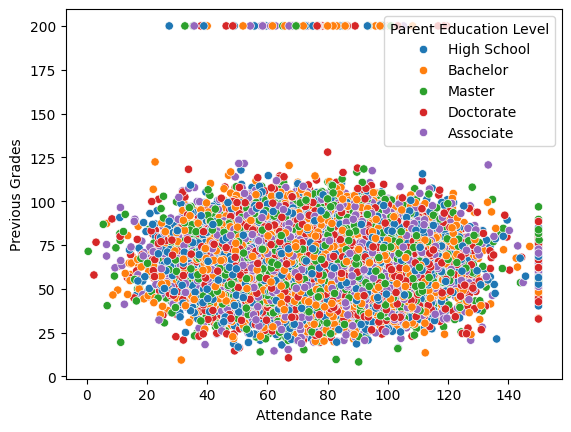

In [208]:
sns.scatterplot(data=temp_df,x='Attendance Rate',y='Previous Grades',hue="Parent Education Level")

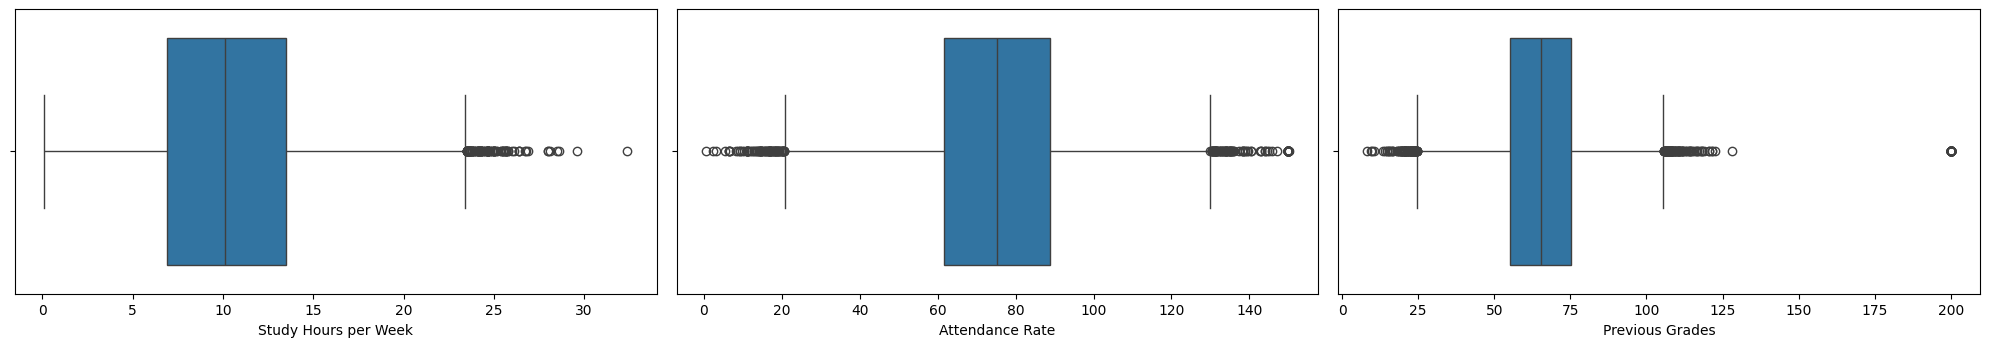

In [209]:
def boxplot(selected_df):
    # print(selected_df)
    plt.figure(figsize=(20,10))
    for i,column in enumerate(selected_df.columns,1):
        # print(column)
        plt.subplot(3,3,i)
        sns.boxplot(data=selected_df,x=column)
    plt.tight_layout()
    plt.show()

boxplot(temp_df.select_dtypes(["float"]))

In [210]:
temp_df.shape

(28683, 7)

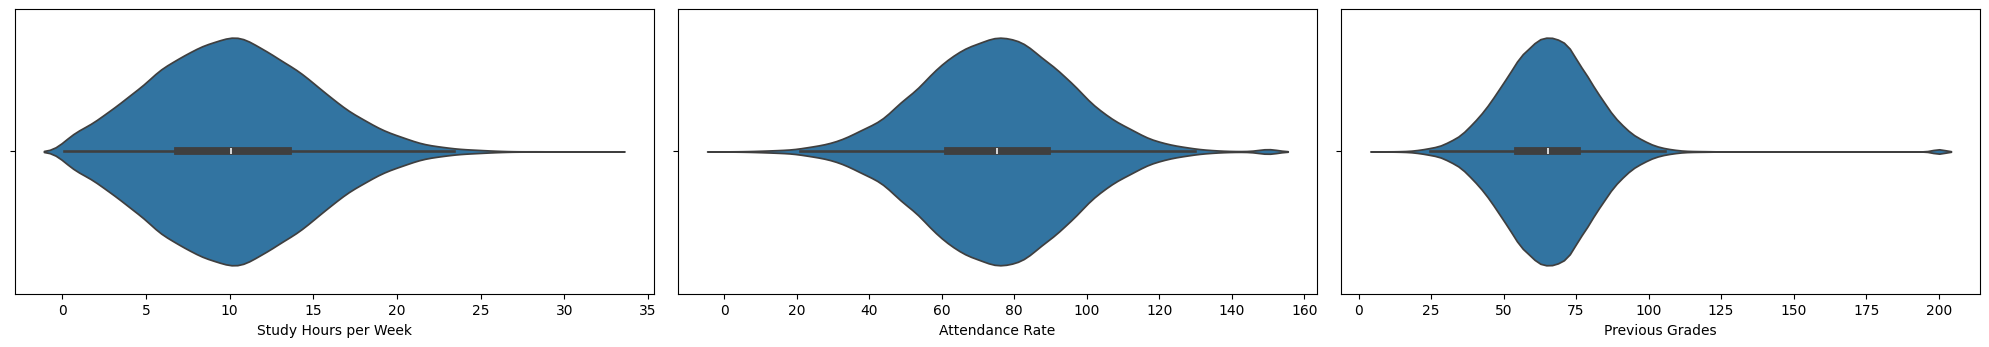

In [211]:
def violinplot(selected_df):
    # print(selected_df)
    plt.figure(figsize=(20,10))
    for i,column in enumerate(selected_df.columns,1):
        # print(column)
        plt.subplot(3,3,i)
        sns.violinplot(data=selected_df,x=column)
    plt.tight_layout()
    plt.show()

violinplot(temp_df.select_dtypes(["float"]))

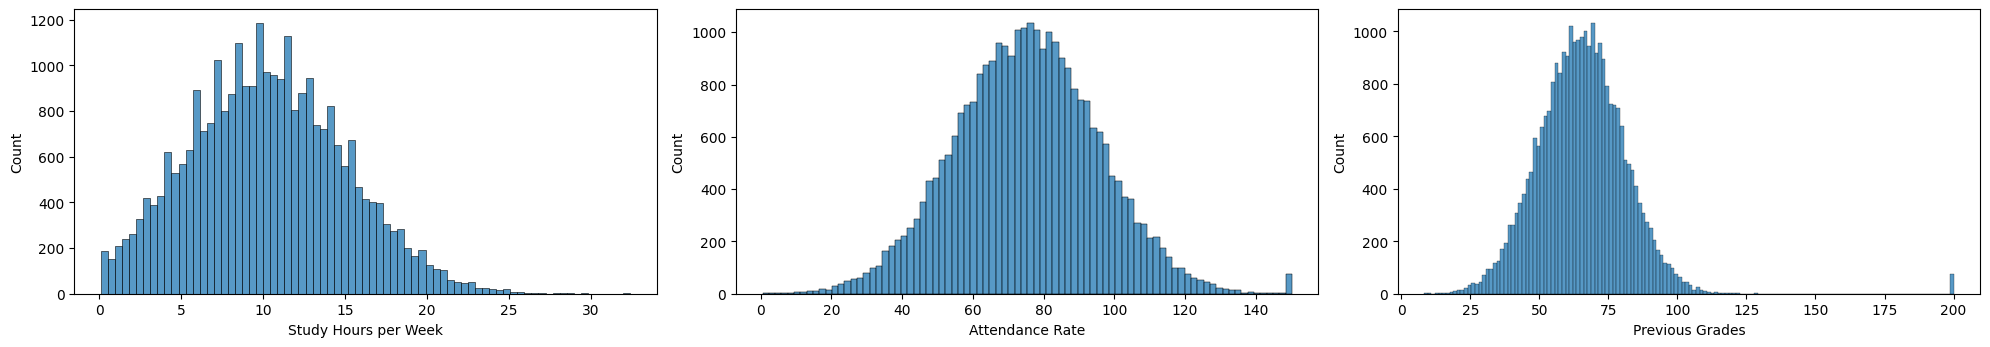

In [212]:
def histplot(selected_df):
    # print(selected_df)
    plt.figure(figsize=(20,10))
    for i,column in enumerate(selected_df.columns,1):
        # print(column)
        plt.subplot(3,3,i)
        sns.histplot(data=selected_df,x=column)
    plt.tight_layout()
    plt.show()

histplot(temp_df.select_dtypes(["float"]))

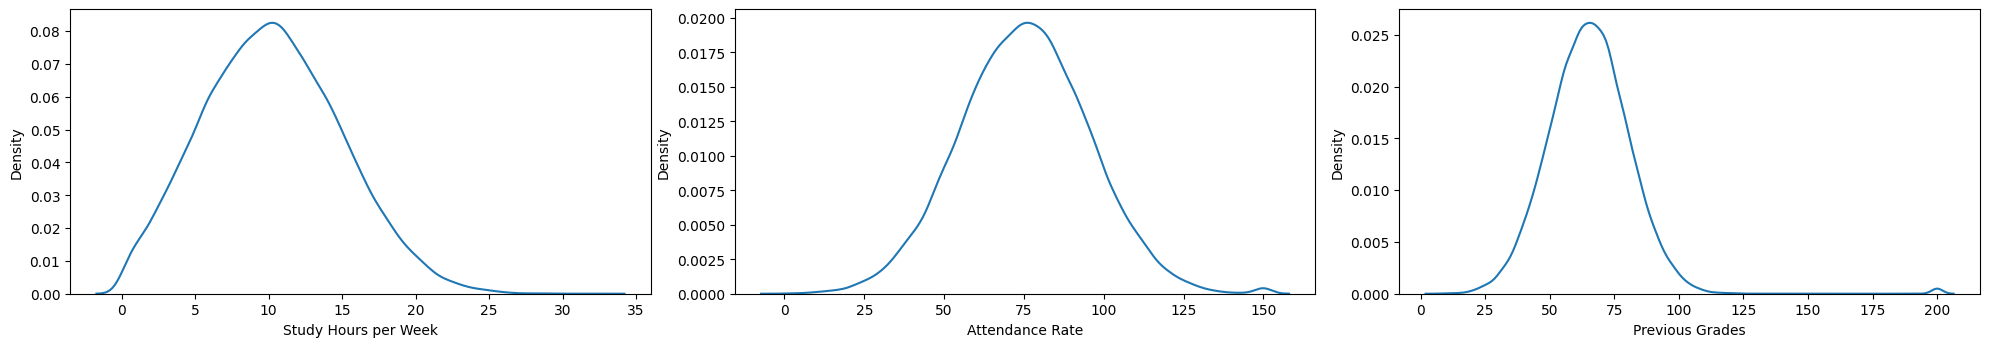

In [213]:
def kdeplot(selected_df):
    # print(selected_df)
    plt.figure(figsize=(20,10))
    for i,column in enumerate(selected_df.columns,1):
        # print(column)
        plt.subplot(3,3,i)
        sns.kdeplot(data=selected_df,x=column)
    plt.tight_layout()
    plt.show()

kdeplot(temp_df.select_dtypes(["float"]))

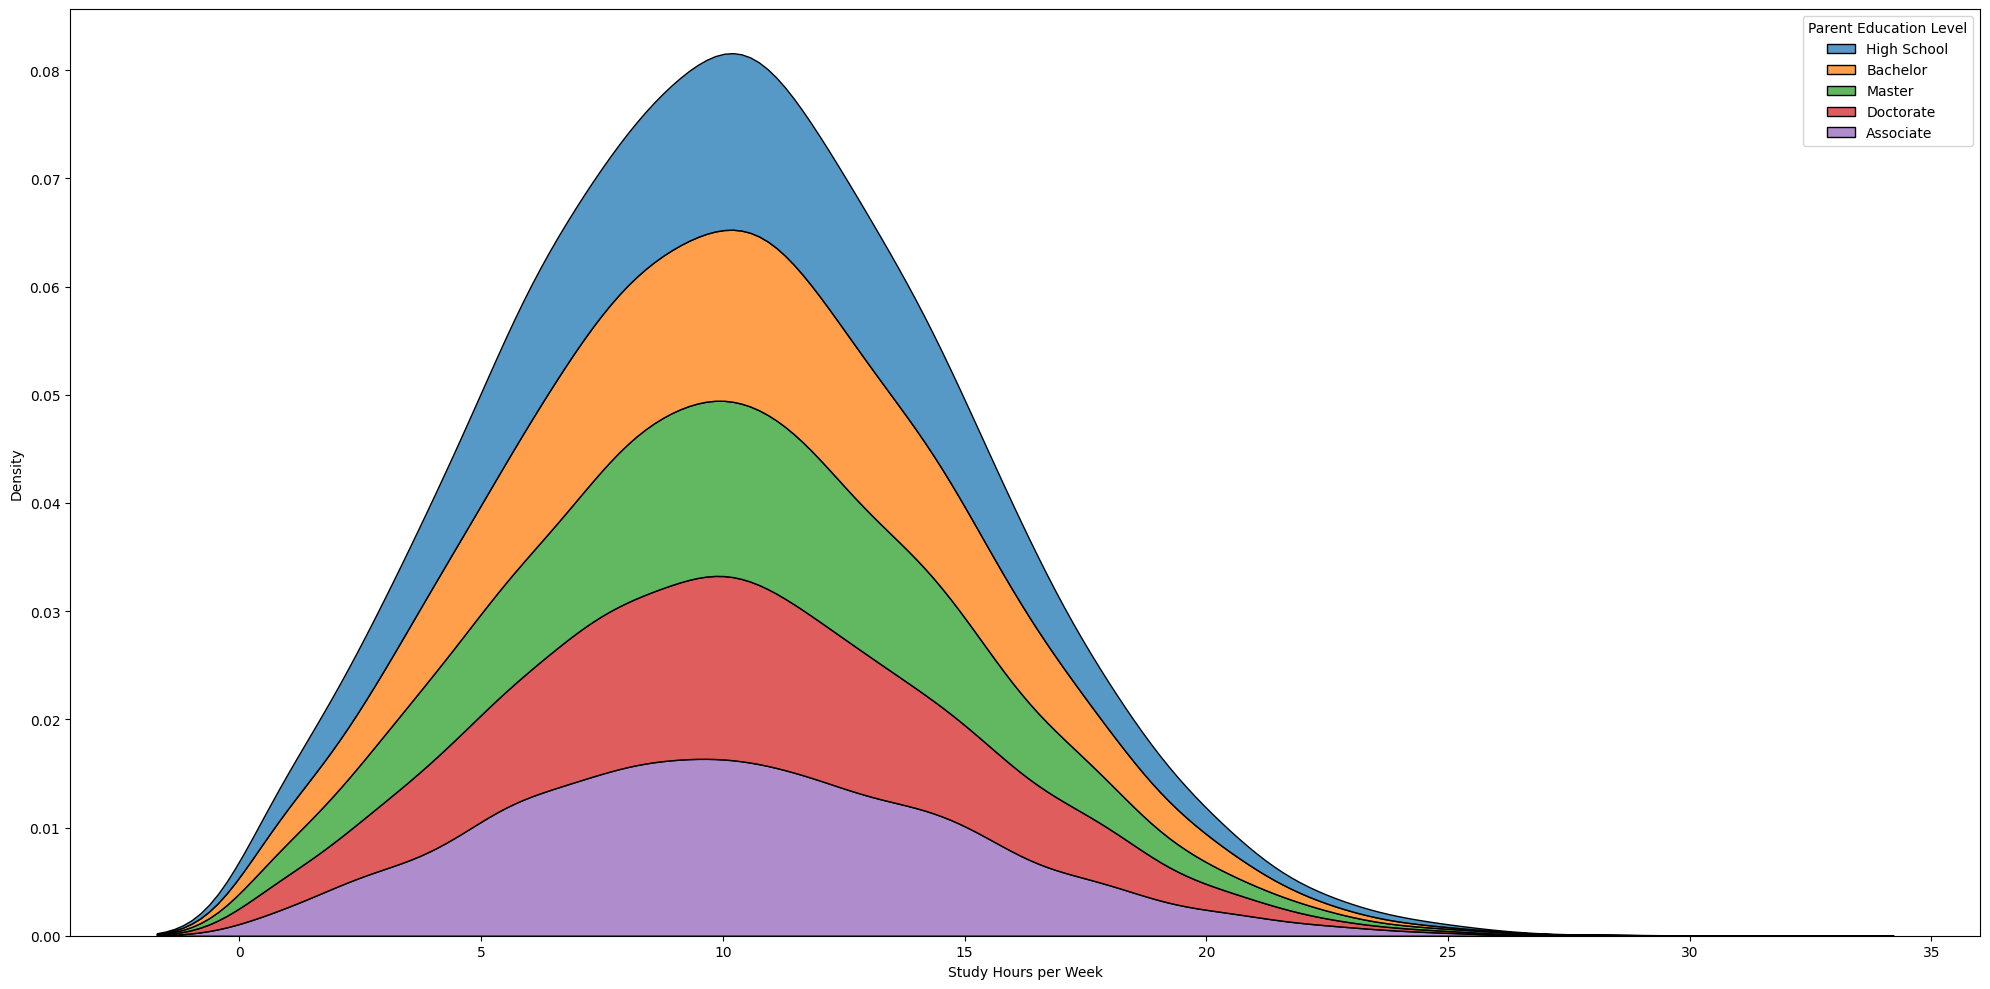

In [214]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=temp_df,x="Study Hours per Week",hue="Parent Education Level",multiple="stack")
plt.tight_layout()
plt.show()

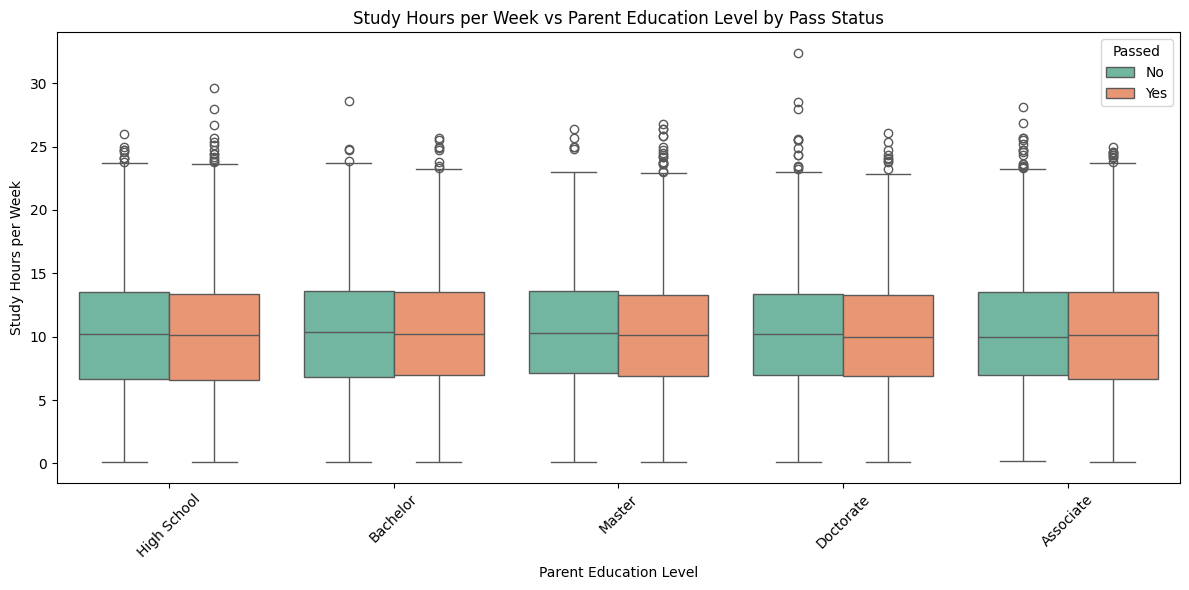

In [215]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=temp_df,
    x="Parent Education Level",
    y="Study Hours per Week",
    hue="Passed",
    palette="Set2"
)

# Add titles and rotate x-labels
plt.title("Study Hours per Week vs Parent Education Level by Pass Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

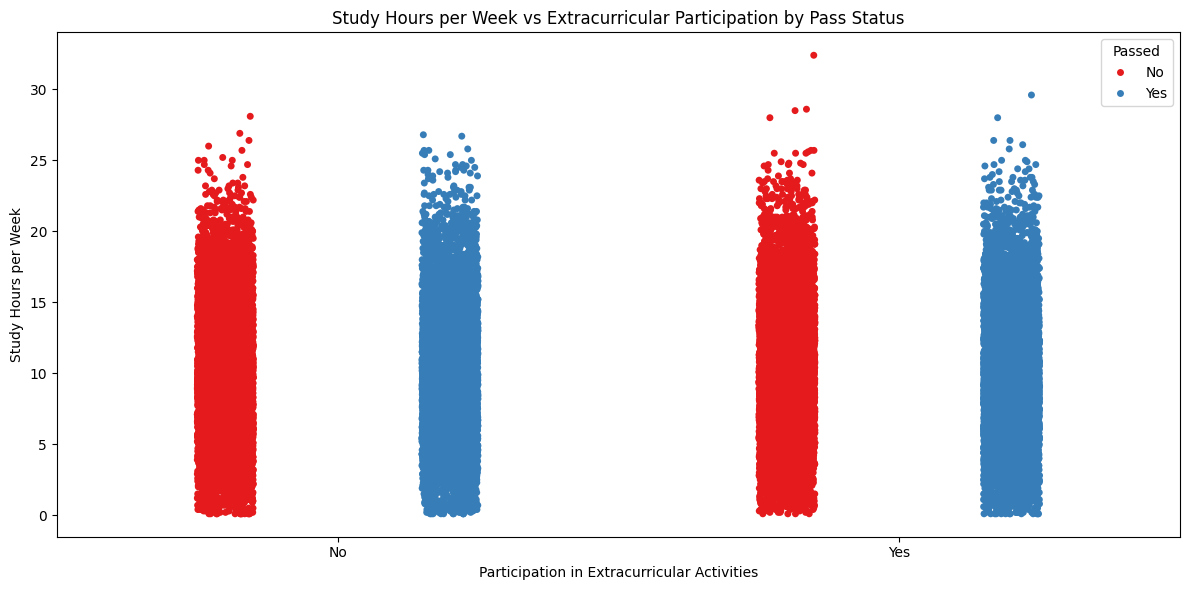

In [216]:
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=temp_df,
    x="Participation in Extracurricular Activities",
    y="Study Hours per Week",
    hue="Passed",
    dodge=True,
    palette="Set1",
    jitter=True
)

plt.title("Study Hours per Week vs Extracurricular Participation by Pass Status")
plt.tight_layout()
plt.show()

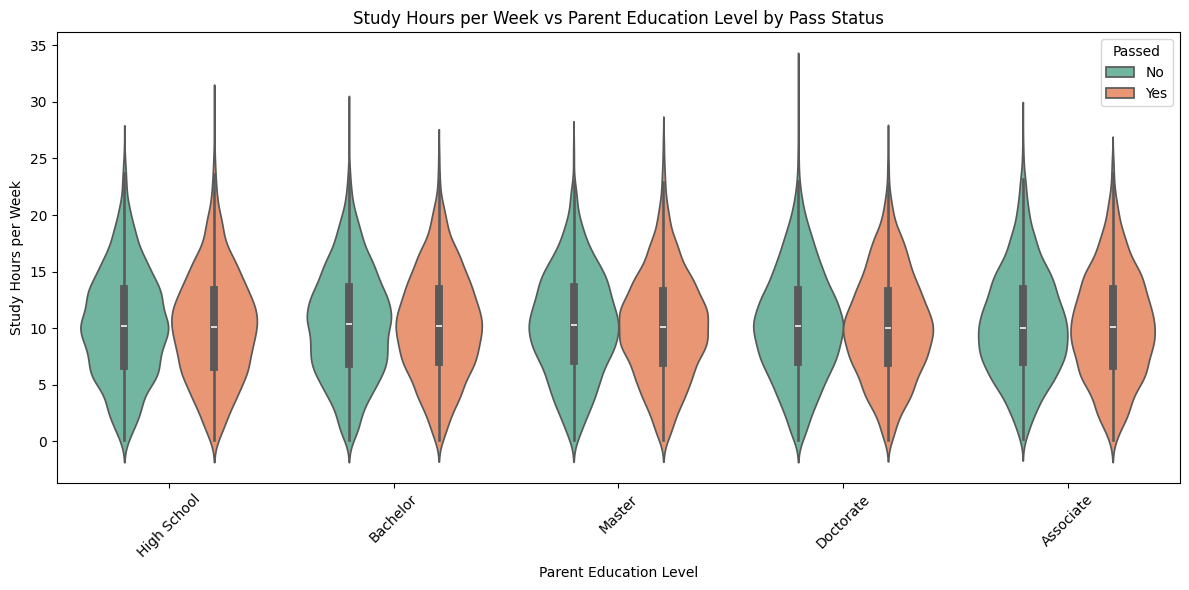

In [217]:
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=temp_df,
    x="Parent Education Level",
    y="Study Hours per Week",
    hue="Passed",
    palette="Set2"
)

# Add titles and rotate x-labels
plt.title("Study Hours per Week vs Parent Education Level by Pass Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [218]:
temp_df

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
1,S00002,9.3,95.3,60.6,No,High School,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
5,S00006,8.8,73.8,69.3,Yes,High School,Yes
6,S00007,17.9,38.6,93.6,No,Doctorate,Yes
...,...,...,...,...,...,...,...
39994,S39995,5.1,92.1,46.1,Yes,Doctorate,No
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No


In [219]:
def calculate_zscore(df):
    arr = np.array(df)
    z_score = (arr-arr.mean())/arr.std()
    return z_score


In [220]:
temp_df["study_hours_per_week_z_score"] = calculate_zscore(temp_df["Study Hours per Week"])

In [221]:
temp_df["attendance_rate_z_score"] = calculate_zscore(temp_df["Attendance Rate"])

In [222]:
temp_df["previous_grades_z_score"] = calculate_zscore(temp_df["Previous Grades"])

In [223]:
temp_df.sample(10)

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed,study_hours_per_week_z_score,attendance_rate_z_score,previous_grades_z_score
27462,S27463,12.3,71.7,70.9,No,High School,No,0.430478,-0.178423,0.331602
32960,S32961,7.2,59.4,53.4,No,Bachelor,Yes,-0.654793,-0.782037,-0.726364
25662,S25663,10.9,79.3,93.6,No,Bachelor,No,0.132561,0.194541,1.703935
34735,S34736,6.4,107.6,56.5,No,High School,Yes,-0.825031,1.583343,-0.538953
29890,S29891,13.8,64.4,33.5,No,Bachelor,No,0.749675,-0.536665,-1.929423
23922,S23923,10.9,56.5,75.1,Yes,Bachelor,No,0.132561,-0.924352,0.585514
5303,S05304,12.8,64.9,45.2,Yes,Bachelor,No,0.536877,-0.512128,-1.222097
31726,S31727,10.0,89.7,50.2,No,Master,Yes,-0.058958,0.704914,-0.919821
26987,S26988,18.6,88.4,61.2,No,Bachelor,Yes,1.771106,0.641117,-0.254814
31569,S31570,15.6,102.2,32.4,No,Associate,Yes,1.132712,1.318342,-1.995924


In [224]:
temp_df = temp_df[
    (temp_df["study_hours_per_week_z_score"] >= -3) & 
    (temp_df["study_hours_per_week_z_score"] <= 3)
]

temp_df = temp_df[
    (temp_df["attendance_rate_z_score"] >= -3) & 
    (temp_df["attendance_rate_z_score"] <= 3)
]

temp_df = temp_df[
    (temp_df["previous_grades_z_score"] >= -3) & 
    (temp_df["previous_grades_z_score"] <= 3)
]

In [225]:
temp_df

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed,study_hours_per_week_z_score,attendance_rate_z_score,previous_grades_z_score
1,S00002,9.3,95.3,60.6,No,High School,No,-0.207916,0.979730,-0.291087
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No,1.558308,0.071856,-0.182267
4,S00005,8.8,89.3,72.7,No,Master,No,-0.314316,0.685284,0.440421
5,S00006,8.8,73.8,69.3,Yes,High School,Yes,-0.314316,-0.075367,0.234873
6,S00007,17.9,38.6,93.6,No,Doctorate,Yes,1.622148,-1.802782,1.703935
...,...,...,...,...,...,...,...,...,...,...
39994,S39995,5.1,92.1,46.1,Yes,Doctorate,No,-1.101669,0.822692,-1.167687
39995,S39996,15.6,93.8,51.4,Yes,Master,No,1.132712,0.906118,-0.847275
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes,0.217680,-0.438517,-0.073448
39997,S39998,13.1,65.6,38.1,No,Bachelor,No,0.600716,-0.477776,-1.651329


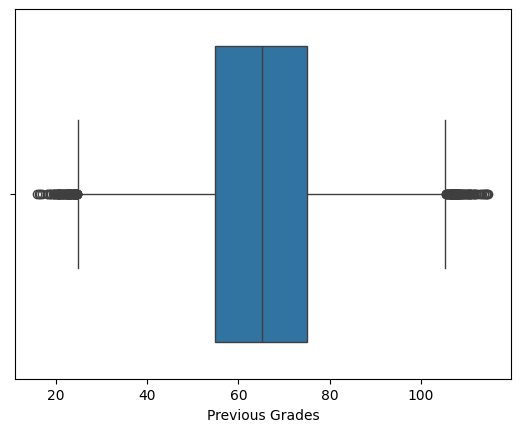

In [226]:
sns.boxplot(data=temp_df,x="Previous Grades")
plt.show()

In [227]:
###### filtered the dataset using z_score, now lets remove the z_score columns, as we do not have any use of it 

In [228]:
temp_df.drop(columns=["study_hours_per_week_z_score","attendance_rate_z_score","previous_grades_z_score"],inplace=True)

In [229]:
######### oh, lets drop studentID too ! 

In [230]:
temp_df.drop(columns="Student ID",inplace=True)

In [231]:
temp_df.head()

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
1,9.3,95.3,60.6,No,High School,No
3,17.6,76.8,62.4,Yes,Bachelor,No
4,8.8,89.3,72.7,No,Master,No
5,8.8,73.8,69.3,Yes,High School,Yes
6,17.9,38.6,93.6,No,Doctorate,Yes


In [232]:
temp_df["Parent Education Level"].value_counts()

Parent Education Level
Bachelor       5738
Associate      5723
High School    5711
Doctorate      5701
Master         5524
Name: count, dtype: int64

In [233]:
########## okayyyyyyyyyyyyyyyyyyyyyyy, lets encode our categorical data into numerical data. Such that our machine learning model can interpret the data !
########## we use one hot encoding for Participation column, ordinal encoder for Parent Education Level column because the order matters and label encoder for Passed column 

In [234]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [235]:
education_order = ["High School","Associate","Bachelor","Master","Doctorate"]
encoder = ColumnTransformer(
    transformers=[
        ("One Hot",OneHotEncoder(drop="first"),["Participation in Extracurricular Activities"]),
        
        ("Ordinal Encoder",OrdinalEncoder(categories=[education_order]),["Parent Education Level"]),
    ],remainder="passthrough"
)

In [236]:
encode_data = encoder.fit_transform(temp_df)


In [237]:
encoded_df = pd.DataFrame(encode_data,columns=encoder.get_feature_names_out())

In [238]:
temp_df

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
1,9.3,95.3,60.6,No,High School,No
3,17.6,76.8,62.4,Yes,Bachelor,No
4,8.8,89.3,72.7,No,Master,No
5,8.8,73.8,69.3,Yes,High School,Yes
6,17.9,38.6,93.6,No,Doctorate,Yes
...,...,...,...,...,...,...
39994,5.1,92.1,46.1,Yes,Doctorate,No
39995,15.6,93.8,51.4,Yes,Master,No
39996,11.3,66.4,64.2,No,Doctorate,Yes
39997,13.1,65.6,38.1,No,Bachelor,No


In [239]:
encoded_df

,One Hot__Participation in Extracurricular Activities_Yes,Ordinal Encoder__Parent Education Level,remainder__Study Hours per Week,remainder__Attendance Rate,remainder__Previous Grades,remainder__Passed
0,0.0,0.0,9.3,95.3,60.6,No
1,1.0,2.0,17.6,76.8,62.4,No
2,0.0,3.0,8.8,89.3,72.7,No
3,1.0,0.0,8.8,73.8,69.3,Yes
4,0.0,4.0,17.9,38.6,93.6,Yes
...,...,...,...,...,...,...
28392,1.0,4.0,5.1,92.1,46.1,No
28393,1.0,3.0,15.6,93.8,51.4,No
28394,0.0,4.0,11.3,66.4,64.2,Yes
28395,0.0,2.0,13.1,65.6,38.1,No


In [240]:
encoded_df.isna().sum()

One Hot__Participation in Extracurricular Activities_Yes    0
Ordinal Encoder__Parent Education Level                     0
remainder__Study Hours per Week                             0
remainder__Attendance Rate                                  0
remainder__Previous Grades                                  0
remainder__Passed                                           0
dtype: int64

In [241]:
encoded_df.duplicated().sum()

0

In [242]:
######## using label encoder for remainder_passed
le = LabelEncoder()
encoded_passed = le.fit_transform(encoded_df["remainder__Passed"])

In [243]:
encoded_df["passed_encoded"] = encoded_passed

In [244]:
encoded_df.isna().sum(),encoded_df.duplicated().sum()

(One Hot__Participation in Extracurricular Activities_Yes    0
 Ordinal Encoder__Parent Education Level                     0
 remainder__Study Hours per Week                             0
 remainder__Attendance Rate                                  0
 remainder__Previous Grades                                  0
 remainder__Passed                                           0
 passed_encoded                                              0
 dtype: int64,
 0)

In [245]:
encoded_df.drop(columns="remainder__Passed",inplace=True)

In [246]:
encoded_df

,One Hot__Participation in Extracurricular Activities_Yes,Ordinal Encoder__Parent Education Level,remainder__Study Hours per Week,remainder__Attendance Rate,remainder__Previous Grades,passed_encoded
0,0.0,0.0,9.3,95.3,60.6,0
1,1.0,2.0,17.6,76.8,62.4,0
2,0.0,3.0,8.8,89.3,72.7,0
3,1.0,0.0,8.8,73.8,69.3,1
4,0.0,4.0,17.9,38.6,93.6,1
...,...,...,...,...,...,...
28392,1.0,4.0,5.1,92.1,46.1,0
28393,1.0,3.0,15.6,93.8,51.4,0
28394,0.0,4.0,11.3,66.4,64.2,1
28395,0.0,2.0,13.1,65.6,38.1,0


In [247]:
encoded_df["passed_encoded"].value_counts()

passed_encoded
0    14221
1    14176
Name: count, dtype: int64

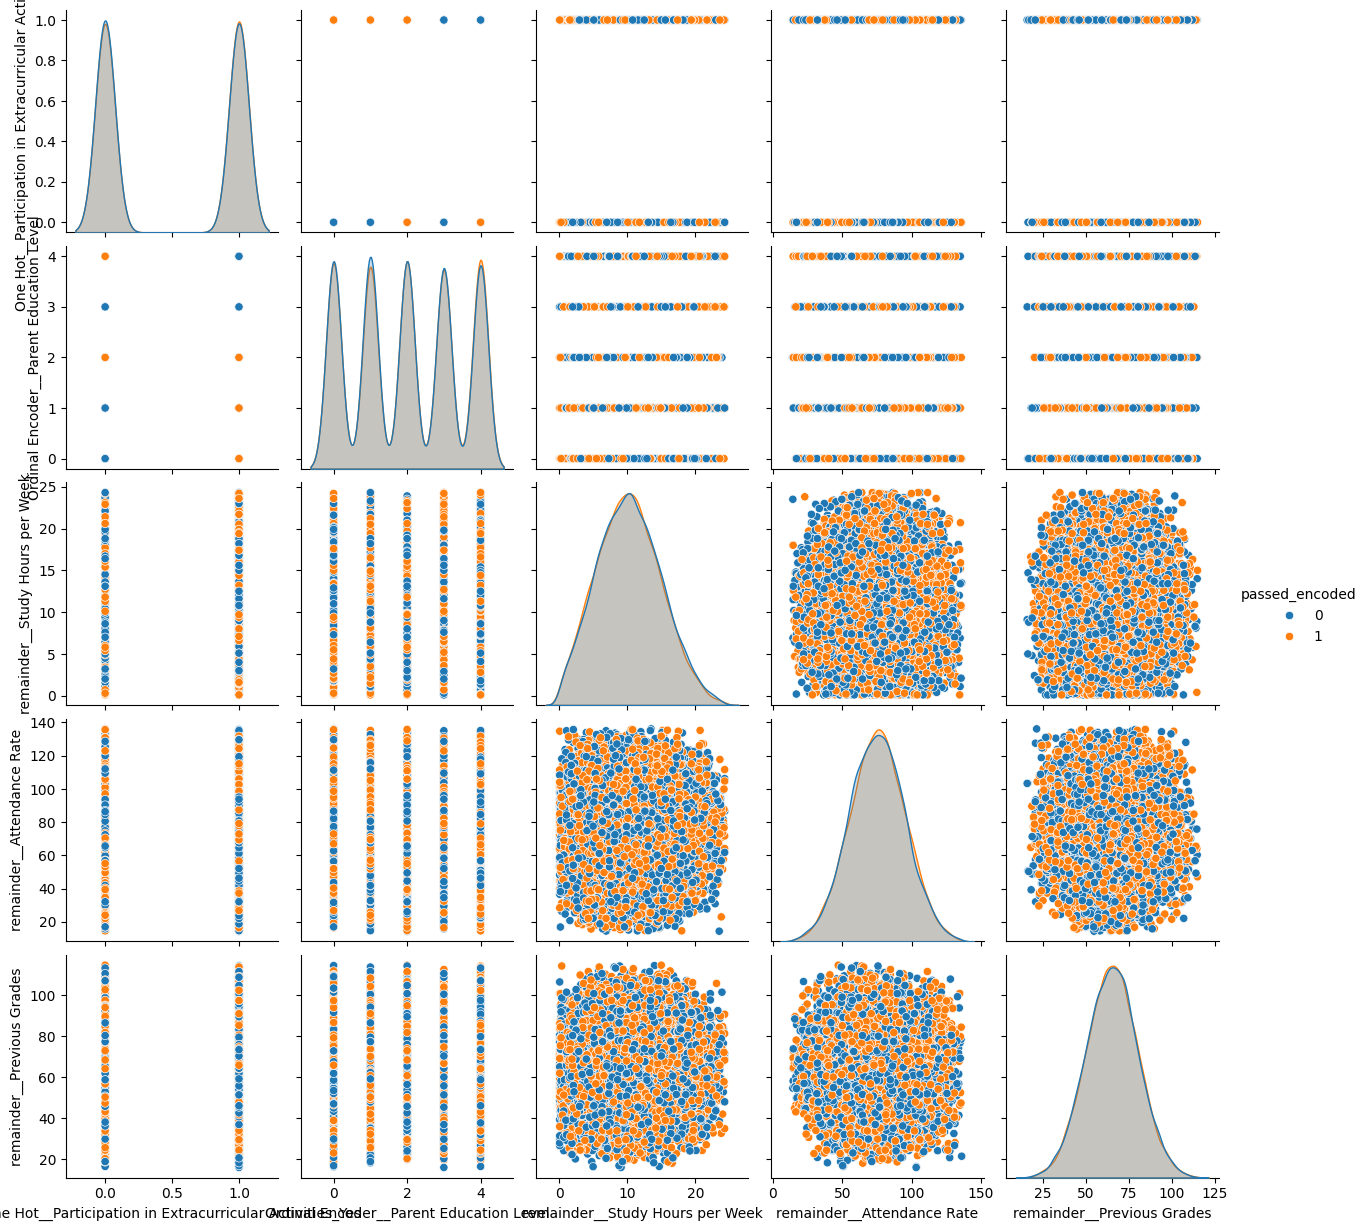

In [248]:
sns.pairplot(encoded_df,hue="passed_encoded")

In [249]:
encoded_df.columns

Index(['One Hot__Participation in Extracurricular Activities_Yes',
       'Ordinal Encoder__Parent Education Level',
       'remainder__Study Hours per Week', 'remainder__Attendance Rate',
       'remainder__Previous Grades', 'passed_encoded'],
      dtype='object')

<Figure size 2000x1000 with 0 Axes>

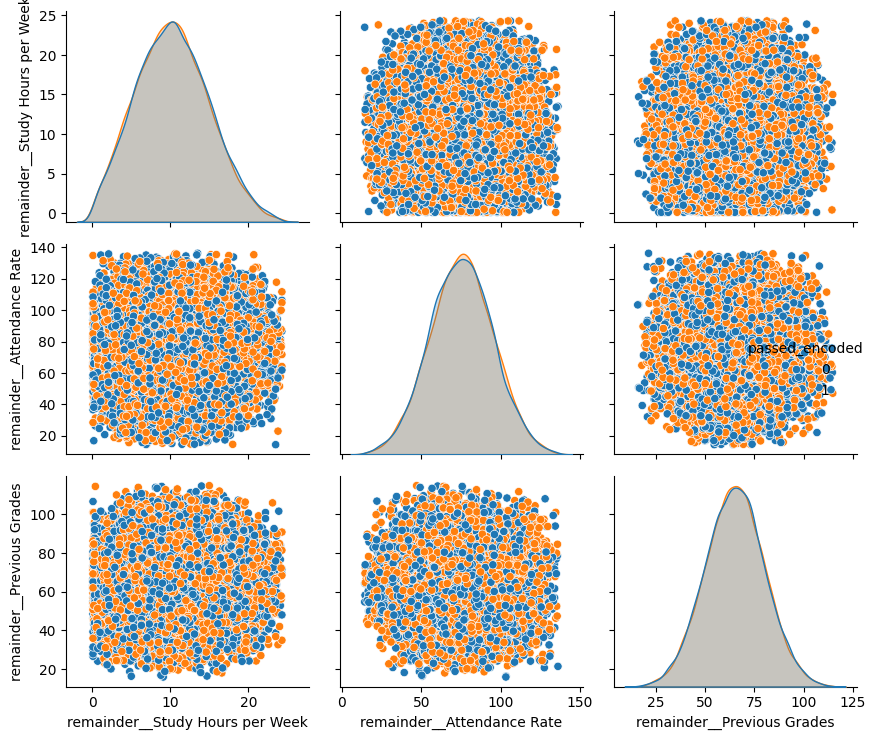

In [250]:
plt.figure(figsize=(20,10))
sns.pairplot(encoded_df[[
    "remainder__Study Hours per Week", 
    "remainder__Attendance Rate", 
    "remainder__Previous Grades",
    "passed_encoded"
]], hue="passed_encoded")
plt.tight_layout()
plt.show()


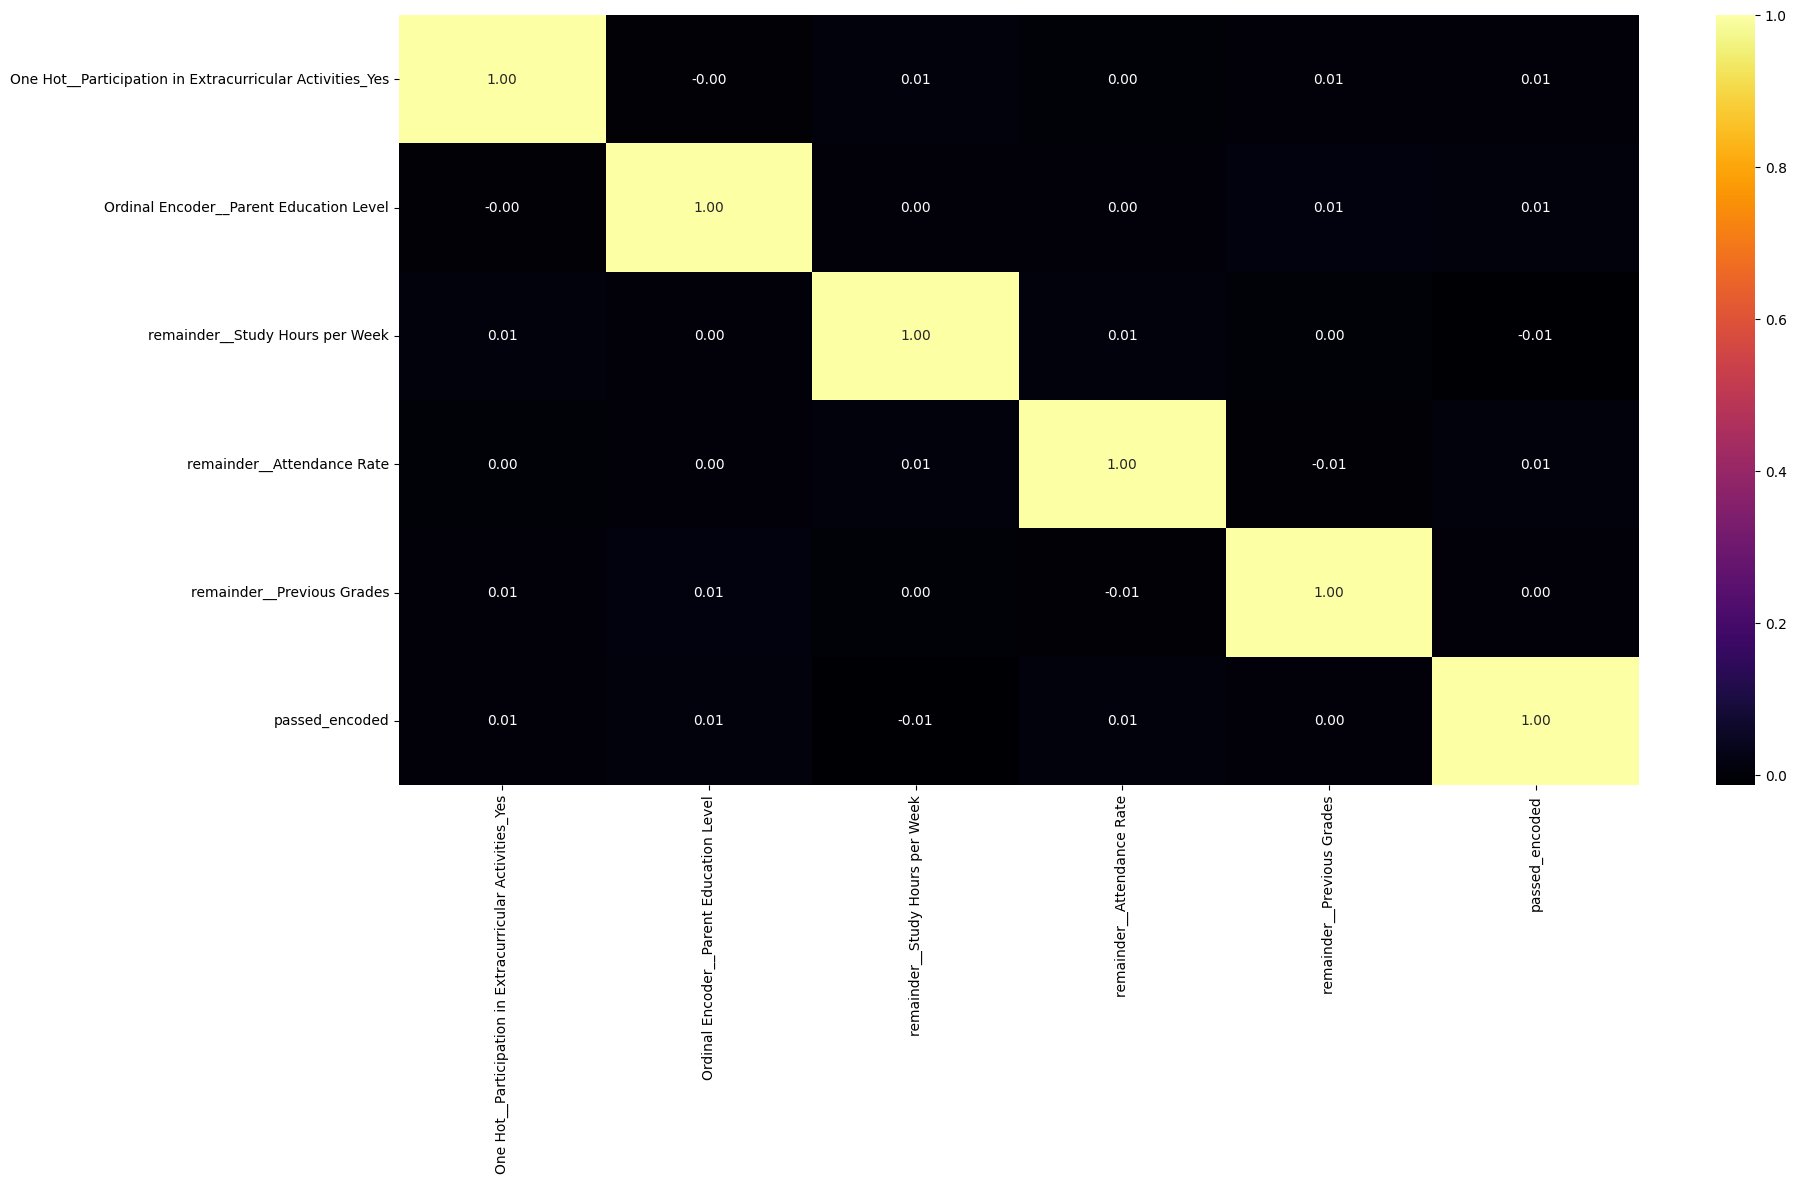

In [251]:
plt.figure(figsize=(20,10))
sns.heatmap(encoded_df.corr(),annot=True,fmt=".2f",cmap="inferno")
plt.show()

In [252]:
####### there seems to be no to 0 corelation, why why why, anyway lets use logisticRegression to classify the data, we will test with other algorithms too, but now, why use logistic regression, because the prediction function is only divided into yes/no type of classification 


In [253]:
X = encoded_df.iloc[:,:-1]
y = encoded_df[["passed_encoded"]]

In [254]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [255]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((22717, 5), (5680, 5), (22717, 1), (5680, 1))

In [256]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [257]:
lr.score(X_train,y_train),lr.score(X_test,y_test) 

(0.5088259893471849, 0.5005281690140845)

In [258]:
y_pred = lr.predict(X_test)

In [259]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [260]:
accuracy_score(y_test,y_pred),confusion_matrix(y_test,y_pred)

(0.5005281690140845,
 array([[1302, 1596],
        [1241, 1541]], dtype=int64))

In [261]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.51      0.45      0.48      2898\n           1       0.49      0.55      0.52      2782\n\n    accuracy                           0.50      5680\n   macro avg       0.50      0.50      0.50      5680\nweighted avg       0.50      0.50      0.50      5680\n'

In [262]:
from sklearn.svm import SVC


In [263]:
svc_model = SVC(kernel="linear",degree=3)
svc_model1 = SVC(kernel="poly")
svc_model2 = SVC(kernel="rbf")

In [264]:
svc_model.fit(X_train,y_train)

c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [265]:
svc_model.score(X_train,y_train)

0.5084738301712374

In [266]:
y_pred_svc_model = svc_model.predict(X_test)

In [267]:
accuracy_score(y_pred_svc_model,y_test)

0.5019366197183098

In [268]:
svc_model1.fit(X_train,y_train)

c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [269]:
y_pred_svc_model1 = svc_model1.predict(X_test)

In [270]:
accuracy_score(y_pred_svc_model1,y_test)

0.4880281690140845

In [271]:
#### maybe the accuracy is low, because i forgot to apply feature scaling to the dataset ! :-> 

In [272]:
svc_model2.fit(X_train,y_train)

c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [273]:
pred_svc_model2 = svc_model2.predict(X_test)

In [275]:
accuracy_score(pred_svc_model2,y_test)
######### this is also very very low ! 

0.49471830985915494

In [307]:
###### okay so lets use KNN algorithm ! 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=200)

In [308]:
knn.fit(X_train,y_train)

c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=200)

In [309]:
knn_pred = knn.predict(X_test)

In [310]:
knn_pred

array([0, 0, 0, ..., 0, 1, 1])

In [311]:
accuracy_score(knn_pred,y_test)

0.497887323943662

<Axes: >

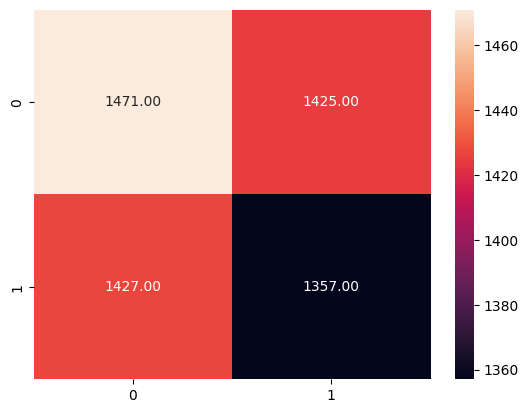

In [312]:
sns.heatmap(confusion_matrix(knn_pred,y_test),annot=True,fmt='.2f')

Now, lets use decision tree and randomForest and complete this session , we will again work on this data to increase the accuracy! 

In [373]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [326]:
rf_clf = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    criterion="entropy",  # or "entropy"
    max_depth=5,       # Control tree depth
    random_state=42
)

In [327]:
model_rfc.fit(X_train,y_train)

c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [328]:
rfc_pred = model_rfc.predict(X_test)

In [330]:
accuracy_score(rfc_pred,y_test)

0.4992957746478873

In [332]:
params_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, None],
    "min_samples_split": [2, 5]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), params_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

print("Best Params:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_

c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: 

Best Params: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}


In [334]:
best_rf_model = RandomForestClassifier(max_depth=3,min_samples_split=2,n_estimators=50)


In [335]:
best_rf_model.fit(X_train,y_train)

c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=3, n_estimators=50)

In [337]:
best_rf_model_prediction = best_rf_model.predict(X_test)

In [339]:
accuracy_score(best_rf_model_prediction,y_test)

0.49859154929577465

Lets do with decision tree 

In [350]:
dt_clf = DecisionTreeClassifier(
    criterion="entropy",  # or "entropy"
    max_depth=3,       # Control tree depth (avoid overfitting)
    random_state=42
)

In [351]:
model_DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [352]:
model_DT_pred = model_DT.predict(X_test)

In [353]:
model_DT_pred

array([0, 1, 1, ..., 0, 0, 0])

In [371]:
accuracy_score(model_DT_pred,y_test)

0.5015845070422535

,One Hot__Participation in Extracurricular Activities_Yes,Ordinal Encoder__Parent Education Level,remainder__Study Hours per Week,remainder__Attendance Rate,remainder__Previous Grades,passed_encoded
0,0.0,0.0,9.3,95.3,60.6,0
1,1.0,2.0,17.6,76.8,62.4,0
2,0.0,3.0,8.8,89.3,72.7,0
3,1.0,0.0,8.8,73.8,69.3,1
4,0.0,4.0,17.9,38.6,93.6,1
...,...,...,...,...,...,...
28392,1.0,4.0,5.1,92.1,46.1,0
28393,1.0,3.0,15.6,93.8,51.4,0
28394,0.0,4.0,11.3,66.4,64.2,1
28395,0.0,2.0,13.1,65.6,38.1,0
